In [ ]:
!pip install ccxt

In [ ]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
print (ccxt.exchanges)

In [ ]:
exchange = ccxt.binance()
ticker = exchange.fetch_ticker(symbol)

current_price = ticker['ask']

print(f'The current price of BTC is {current_price} USDT')

OHLC Data of last 24 hours

In [66]:
yesterday_time = int((datetime.utcnow() - timedelta(hours=24)).timestamp()) * 1000 # time 24 hours ago in milliseconds
since_time = int((datetime.utcnow() - timedelta(minutes=440)).timestamp()) * 1000 # time since 1000 minutes from 24 hours ago in milliseconds

OHLC = pd.DataFrame(exchange.fetch_ohlcv(
    symbol= 'BTC/USDT',
    timeframe= '1m',
    since= yesterday_time,
    limit= 1000 # max datapoints per call

), columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
)
OHLC_data_since = pd.DataFrame(exchange.fetch_ohlcv(
    symbol= 'BTC/USDT',
    timeframe= '1m',
    since= since_time,

), columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
)

combined_OHLC = pd.concat([OHLC, OHLC_data_since], ignore_index=True)


combined_OHLC['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in combined_OHLC['Time']]
combined_OHLC.set_index('Time', inplace=True)

combined_OHLC

,Open,High,Low,Close,Volume
Time,,,,,
2023-10-07 01:28:00,27912.05,27913.31,27912.04,27913.31,5.52922
2023-10-07 01:29:00,27913.31,27918.72,27913.30,27918.72,7.73921
2023-10-07 01:30:00,27918.71,27918.72,27918.71,27918.72,3.36247
2023-10-07 01:31:00,27918.72,27918.72,27916.27,27916.28,9.11740
2023-10-07 01:32:00,27916.28,27920.72,27916.27,27920.71,9.45100
...,...,...,...,...,...
2023-10-07 21:23:00,27951.45,27951.45,27950.00,27950.00,1.88339
2023-10-07 21:24:00,27950.01,27950.01,27950.00,27950.01,2.19738
2023-10-07 21:25:00,27950.01,27950.01,27947.24,27947.24,1.52131


Plotting

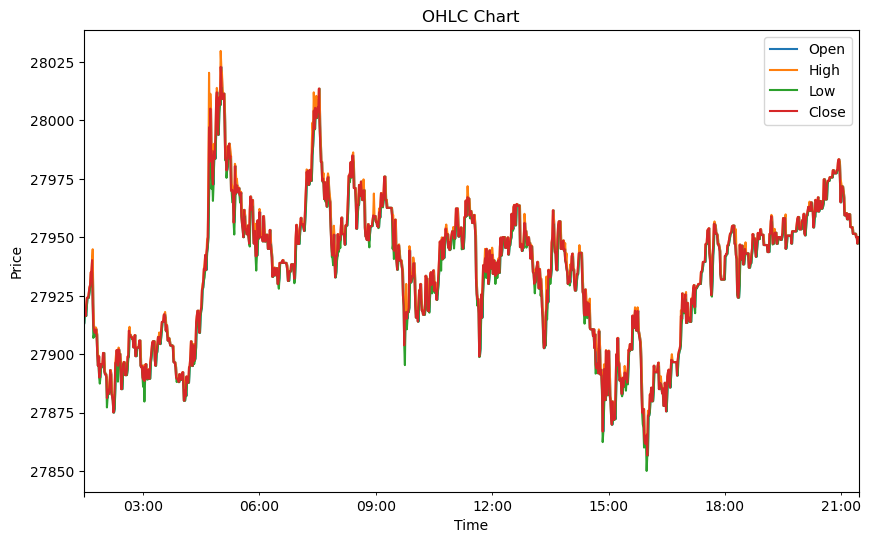

In [67]:
combined_OHLC[['Open', 'High', 'Low', 'Close']].plot(style='-', figsize=(10, 6))

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('OHLC Chart')

plt.show()
